# **Clustering Professional Basketball Players Based on Performance**

## **Data Source**

To cluster NBA basketball players based on their performance in the 2022-2023 season, we collected statistics from [Kaggle](https://www.kaggle.com/datasets/bryanchungweather/nba-players-data-2022-2023/data) on NBA player data specific to that season.

The dataset encompasses comprehensive information about the performance of every NBA player during the 2022-2023 regular season. It includes various metrics such as points per game, assists per game, and similar statistics for each player. Further details will be elaborated upon in the understanding data section. 

## **Analysis Process**
The acquired data will undergo a data cleaning stage with the aim of improving the quality of clustering results. During this phase, a series of checks will be performed on the data. Firstly, we will verify whether there are any duplicate entries. Subsequently, we will examine the data for the presence of empty values, and finally, we will scrutinize it to identify any inaccuracies in the entered dataset.

Once the data successfully completes the data cleaning stage, it will proceed to the clustering stage. In this stage, we will use k-means clustering to establish new clusters for NBA players based on statistical information from the 2022–2023 season. Our next objective is to determine the optimal K value that generates the most meaningful clusters given the available data. Following this, we will conduct a thorough interpretation of the clustering results.

## **Import Libraries**

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as mno

# Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Suppressing warning messages to keep the code clean
import warnings
warnings.filterwarnings('ignore')

## **Data Understandiing**

In [2]:
# Import data
df = pd.read_csv('nba_2022_2023.csv')

In [3]:
# First 5 rows in dataset
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [4]:
# Basic information for each column
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print('Number of rows and columns', df.shape)
dfDesc

Number of rows and columns (679, 29)


,dataFeatures,dataType,null,unique,uniqueSample
0,Player,object,0,539,"[Deandre Ayton, Gorgui Dieng]"
1,Pos,object,0,11,"[PG, SG]"
2,Age,int64,0,22,"[25, 37]"
3,Tm,object,0,31,"[MIN, MEM]"
4,G,int64,0,83,"[16, 39]"
5,GS,int64,0,80,"[77, 33]"
6,MP,float64,0,308,"[33.5, 26.7]"
7,FG,float64,0,101,"[2.9, 5.1]"
8,FGA,float64,0,174,"[2.6, 9.3]"
9,FG%,float64,3,279,"[0.409, 0.566]"


### **Information for Several Columns**

- 'G': Games played
- 'MP': Minutes played per game
- 'Tm': Team for which the player played when these statistics were recorded
- 'PTS': Points scored per game
- 'FG': Field goals made per game
- 'FGA': Field goals attempted per game
- 'FG%': Field goal percentage
- '3P': 3-point field goals made per game
- '3PA': 3-point field goals attempted per game
- '3P%': 3-point field goal percentage
- '2P': 2-point field goals made per game
- '2PA': 2-point field goals attempted per game
- '2P%': 2-point field goal percentage
- 'FT': Free throws made per game
- 'FTA': Free throws attempted per game
- 'FT%': Free throw percentage per game
- 'ORB': Offensive rebounds per game
- 'DRB': Defensive rebounds per game
- 'AST': Assists per game
- 'STL': Steals per game

In [5]:
# Statistical summary of numerical columns
df.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,676.000000,679.000000,679.000000,655.000000,...,642.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,26.025037,43.337261,20.069219,19.464212,3.249337,6.921060,0.464241,0.996613,2.783063,0.329798,...,0.752586,0.842268,2.620324,3.461708,2.011782,0.601767,0.370545,1.067305,1.660825,8.859057
std,4.325709,24.729145,25.766359,9.415320,2.362501,4.795565,0.112790,0.862033,2.209284,0.128238,...,0.150094,0.731867,1.715881,2.281077,1.891335,0.392063,0.367465,0.799478,0.770299,6.630944
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,22.000000,0.000000,12.150000,1.500000,3.400000,0.415000,0.300000,1.000000,0.297000,...,0.686500,0.300000,1.400000,1.800000,0.800000,0.300000,0.100000,0.500000,1.200000,4.100000
50%,25.000000,45.000000,6.000000,18.800000,2.600000,5.700000,0.454000,0.800000,2.400000,0.349000,...,0.769000,0.700000,2.300000,3.000000,1.300000,0.500000,0.300000,0.900000,1.600000,6.900000
75%,29.000000,65.500000,36.500000,27.550000,4.200000,9.200000,0.506000,1.500000,4.150000,0.389000,...,0.844750,1.100000,3.400000,4.500000,2.700000,0.800000,0.500000,1.400000,2.200000,11.550000
max,42.000000,83.000000,83.000000,41.000000,11.200000,22.200000,1.000000,4.900000,11.400000,1.000000,...,1.000000,5.100000,9.600000,12.500000,10.700000,3.000000,3.000000,4.100000,5.000000,33.100000


## **Data Cleaning**

In [6]:
# Checking for duplicate players
df[df.duplicated('Player')]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
6,Nickeil Alexander-Walker,SG,24,UTA,36,3,14.7,2.3,4.7,0.488,...,0.692,0.2,1.4,1.6,2.1,0.7,0.4,1.3,1.6,6.3
7,Nickeil Alexander-Walker,SG,24,MIN,23,0,15.5,2.1,5.4,0.384,...,0.619,0.3,1.5,1.8,1.4,0.3,0.3,0.4,1.3,5.9
17,Ryan Arcidiacono,PG,28,NYK,11,0,2.4,0.1,0.5,0.200,...,NaN,0.0,0.4,0.4,0.2,0.2,0.0,0.1,0.3,0.3
18,Ryan Arcidiacono,PG,28,POR,9,4,16.2,0.9,3.6,0.250,...,NaN,0.0,1.2,1.2,2.3,0.3,0.0,0.7,1.6,2.6
26,Mo Bamba,C,24,ORL,40,6,17.0,2.7,5.4,0.495,...,0.686,1.2,3.4,4.6,1.1,0.3,1.0,0.6,2.2,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,T.J. Warren,SF,29,PHO,16,0,12.3,1.9,4.4,0.429,...,0.500,0.8,2.3,3.1,0.7,0.4,0.3,0.2,1.3,4.2
643,Russell Westbrook,PG,34,LAL,52,3,28.7,5.8,14.0,0.417,...,0.655,1.1,5.0,6.2,7.5,1.0,0.4,3.5,2.3,15.9
644,Russell Westbrook,PG,34,LAC,21,21,30.2,6.1,12.5,0.489,...,0.658,1.4,3.4,4.9,7.6,1.1,0.5,3.4,2.0,15.8
668,James Wiseman,C,21,GSW,21,0,12.5,2.8,4.5,0.628,...,0.684,0.9,2.6,3.5,0.7,0.1,0.3,0.7,1.9,6.9


In [7]:
# Checking for players with value 'TOT' in 'Tm' column
df[df['Tm']=='TOT']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5,Nickeil Alexander-Walker,SG,24,TOT,59,3,15.0,2.2,5.0,0.444,...,0.667,0.3,1.5,1.7,1.8,0.5,0.4,0.9,1.5,6.2
16,Ryan Arcidiacono,PG,28,TOT,20,4,8.6,0.5,1.9,0.243,...,NaN,0.0,0.8,0.8,1.2,0.3,0.0,0.4,0.9,1.3
25,Mo Bamba,C,24,TOT,49,7,15.7,2.4,4.9,0.485,...,0.661,1.2,3.4,4.6,0.9,0.3,0.9,0.6,2.1,6.6
35,Will Barton,SG,32,TOT,56,2,17.7,2.5,6.5,0.379,...,0.787,0.3,2.2,2.4,2.0,0.5,0.2,0.9,1.0,6.8
41,Darius Bazley,C,22,TOT,43,1,14.3,1.9,4.3,0.454,...,0.543,0.8,2.4,3.2,0.9,0.5,0.8,0.6,1.0,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,Juan Toscano-Anderson,SF,29,TOT,52,9,13.5,1.2,2.8,0.448,...,0.792,0.5,1.8,2.4,1.3,0.3,0.2,0.7,1.5,3.0
615,Jarred Vanderbilt,PF,23,TOT,78,65,24.1,3.2,5.8,0.548,...,0.691,2.2,5.3,7.5,2.4,1.1,0.3,1.2,2.4,7.9
631,T.J. Warren,PF-SF,29,TOT,42,0,16.4,3.1,6.4,0.489,...,0.800,0.6,2.3,2.9,1.0,0.5,0.3,0.5,1.5,7.5
642,Russell Westbrook,PG,34,TOT,73,24,29.1,5.9,13.6,0.436,...,0.656,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9


**Explaination and Action**

- The dataset contains approximately 140 instances of duplicated data.
- This occurrence is attributed to players changing teams during the season.
- The 'TOT' team is present in this dataset, serving as a consolidated statistics column for players who have switched teams.
- Since team information won't play a role in clustering determination, the approach involves removing duplicate data. Consequently, we will retain player information from the 'TOT' team data, representing the comprehensive statistics for players who have changed teams.

In [8]:
# Removing duplicate players
df.drop_duplicates('Player', inplace=True)
df.shape

(539, 29)

In [9]:
# Checking missing values
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).round(2).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent Missing'])

,Total Missing,Percent Missing
FT%,24,4.45
3P%,16,2.97
2P%,5,0.93
eFG%,2,0.37
FG%,2,0.37
Player,0,0.00
PF,0,0.00
TOV,0,0.00
BLK,0,0.00
STL,0,0.00


In [10]:
# Checking missing value in 'FT%'
df[df['FT%'].isna()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
16,Ryan Arcidiacono,PG,28,TOT,20,4,8.6,0.5,1.9,0.243,...,NaN,0.0,0.8,0.8,1.2,0.3,0.0,0.4,0.9,1.3
65,Leandro Bolmaro,SF,22,UTA,14,0,4.9,0.2,1.4,0.150,...,NaN,0.3,0.2,0.5,0.5,0.2,0.1,0.5,0.7,0.4
90,Sterling Brown,SF,27,LAL,4,0,6.0,0.0,1.0,0.000,...,NaN,0.8,1.3,2.0,0.5,0.8,0.0,0.0,1.0,0.0
98,Deonte Burton,PF,29,SAC,2,0,3.0,0.0,1.0,0.000,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,Jared Butler,PG,22,OKC,6,1,12.8,2.5,5.3,0.469,...,NaN,0.2,0.5,0.7,1.3,0.8,0.0,0.8,0.8,6.2
115,Justin Champagnie,SF,21,TOT,5,0,6.8,1.0,3.0,0.333,...,NaN,0.6,1.0,1.6,0.8,0.2,0.0,0.0,0.4,2.2
161,Tyler Dorsey,SF,26,DAL,3,0,2.7,1.3,1.7,0.800,...,NaN,0.3,0.3,0.7,0.0,0.0,0.0,0.0,0.0,3.0
164,Devon Dotson,PG,23,WAS,6,0,8.8,0.2,1.7,0.100,...,NaN,1.0,0.7,1.7,1.3,0.8,0.0,0.5,1.5,0.5
166,PJ Dozier,SF,26,SAC,16,0,4.9,0.6,2.1,0.303,...,NaN,0.1,0.8,0.9,0.6,0.4,0.1,0.3,0.4,1.4
196,Michael Foster Jr.,PF,20,PHI,1,0,1.0,0.0,0.0,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Checking missing value in '3P%'
df[df['3P%'].isna()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
21,Udoka Azubuike,C,23,UTA,36,4,10.0,1.6,2.0,0.819,...,0.350,0.9,2.4,3.3,0.3,0.2,0.4,0.5,0.9,3.5
60,Bismack Biyombo,C,30,PHO,61,14,14.3,2.0,3.4,0.578,...,0.357,1.5,2.8,4.3,0.9,0.3,1.4,0.8,1.9,4.3
87,Moses Brown,C,23,TOT,36,1,8.2,1.7,2.7,0.635,...,0.458,1.6,2.3,3.9,0.1,0.1,0.4,0.4,1.1,4.3
107,Vernon Carey Jr.,C,21,WAS,11,0,2.5,0.2,0.7,0.250,...,1.000,0.3,0.7,1.0,0.3,0.2,0.2,0.2,0.5,0.5
127,Chance Comanche,C,26,POR,1,0,21.0,3.0,5.0,0.600,...,0.250,2.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,7.0
196,Michael Foster Jr.,PF,20,PHI,1,0,1.0,0.0,0.0,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,Daniel Gafford,C,24,WAS,78,47,20.6,3.7,5.1,0.732,...,0.679,2.1,3.5,5.6,1.1,0.4,1.3,1.1,2.4,9.0
341,Braxton Key,SF,25,DET,3,0,3.0,0.3,0.3,1.000,...,1.000,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.0,1.3
430,Chima Moneke,SF,27,SAC,2,0,4.0,0.5,1.0,0.500,...,0.000,1.0,0.0,1.0,0.5,0.0,0.0,1.0,1.0,1.0
490,Mason Plumlee,C,32,TOT,79,60,26.0,4.2,6.1,0.680,...,0.636,2.9,6.0,8.9,3.1,0.6,0.6,1.5,2.7,10.8


In [12]:
# Checking missing value in '2P%'
df[df['2P%'].isna()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
196,Michael Foster Jr.,PF,20,PHI,1,0,1.0,0.0,0.0,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211,Jacob Gilyard,PG,24,MEM,1,0,41.0,1.0,3.0,0.333,...,NaN,0.0,4.0,4.0,7.0,3.0,0.0,2.0,3.0,3.0
336,Trevor Keels,SG,19,NYK,3,0,2.7,0.3,1.3,0.250,...,NaN,0.0,0.7,0.7,0.0,0.0,0.0,0.0,0.0,1.0
613,Stanley Umude,SG,23,DET,1,0,2.0,0.0,1.0,0.000,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
652,Alondes Williams,SG,23,BRK,1,0,5.0,0.0,0.0,NaN,...,NaN,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0


In [13]:
# Checking missing value in 'eFG%'
df[df['eFG%'].isna()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
196,Michael Foster Jr.,PF,20,PHI,1,0,1.0,0.0,0.0,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
652,Alondes Williams,SG,23,BRK,1,0,5.0,0.0,0.0,NaN,...,NaN,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0


In [14]:
# Checking missing value in 'FG%'
df[df['FG%'].isna()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
196,Michael Foster Jr.,PF,20,PHI,1,0,1.0,0.0,0.0,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
652,Alondes Williams,SG,23,BRK,1,0,5.0,0.0,0.0,NaN,...,NaN,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0


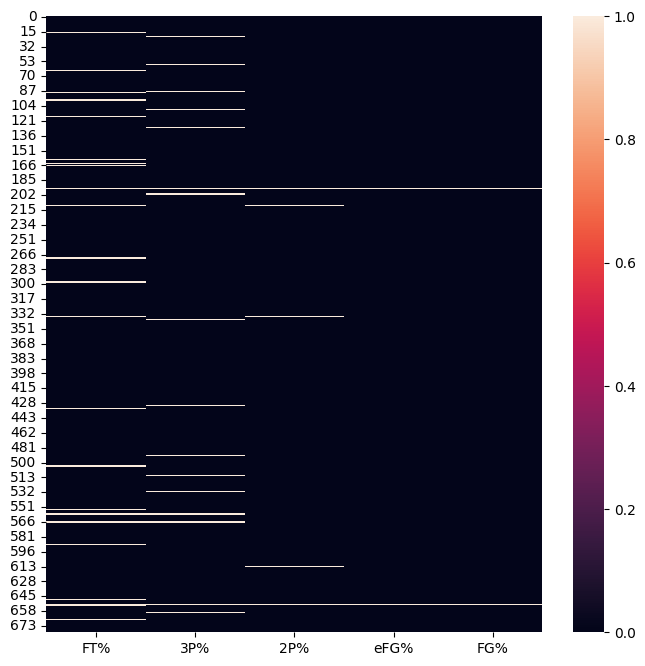

In [15]:
# Visualizing missing values
plt.figure(figsize=(8,8))
sns.heatmap(df[['FT%','3P%','2P%','eFG%','FG%']].isna())
plt.show()

**Explaination and Action**

- Missing values have been identified in five columns, specifically in the FT%, 3P%, 2P%, eFG%, and FG% columns.
- Among these, the FT% column exhibits the highest number of missing values, accounting for a proportion of 4.45%.
- After cross-referencing with additional data, it has been determined that these missing values will be filled with '0'. This decision is based on the understanding that when a player lacks a value in the FT% column, the corresponding data is essentially empty and will be replaced with '0'.

In [16]:
# Fill missing values with 0
df.fillna(0, inplace=True)

# Checking missing value
df[['FT%','3P%','2P%','eFG%','FG%']].isna().sum()

FT%     0
3P%     0
2P%     0
eFG%    0
FG%     0
dtype: int64

In [17]:
# Checking unique value in 'Pos'
df['Pos'].value_counts()

Pos
SG       126
C        108
SF       103
PF       102
PG        91
SG-PG      2
SF-SG      2
PG-SG      2
SF-PF      1
PF-C       1
PF-SF      1
Name: count, dtype: int64

In [18]:
# Checking players with multiple positions
filterd_positions = ['SG-PG', 'SF-SG', 'PG-SG', 'SF-PF', 'PF-C', 'PF-SF']
df[df['Pos'].isin(filterd_positions)]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
50,Patrick Beverley,SG-PG,34,TOT,67,67,27.1,2.1,5.4,0.400,...,0.723,0.7,3.0,3.7,2.9,0.9,0.6,0.9,2.8,6.2
77,Mikal Bridges,SF-SG,26,TOT,83,83,35.7,7.1,15.3,0.468,...,0.895,1.0,3.4,4.4,3.3,1.1,0.7,1.5,1.9,20.1
156,Spencer Dinwiddie,SG-PG,29,TOT,79,79,34.5,5.8,13.3,0.438,...,0.812,0.4,3.1,3.4,6.5,0.8,0.3,1.8,2.4,17.3
268,George Hill,PG-SG,36,TOT,46,1,18.1,1.7,3.6,0.470,...,0.764,0.3,1.5,1.8,2.4,0.6,0.1,0.7,1.2,5.0
293,Kyrie Irving,PG-SG,30,TOT,60,60,37.4,9.9,20.1,0.494,...,0.905,1.0,4.1,5.1,5.5,1.1,0.8,2.1,2.8,27.1
346,Kevin Knox,SF-PF,23,TOT,63,5,15.1,2.4,5.3,0.458,...,0.767,0.5,2.3,2.8,0.5,0.4,0.2,0.8,1.5,6.6
551,Dario Šarić,PF-C,28,TOT,57,12,14.1,2.2,4.9,0.458,...,0.829,0.9,2.7,3.6,1.3,0.4,0.1,1.0,1.7,6.4
600,Matisse Thybulle,SF-SG,25,TOT,71,28,16.9,1.5,3.6,0.435,...,0.679,0.6,1.4,2.0,0.7,1.2,0.5,0.3,1.6,4.1
631,T.J. Warren,PF-SF,29,TOT,42,0,16.4,3.1,6.4,0.489,...,0.800,0.6,2.3,2.9,1.0,0.5,0.3,0.5,1.5,7.5


**Explaination and Action**

- The data includes information on players who occupy more than one position.
- It is evident that exclusively the players affiliated with the 'TOT' team possess multiple positions.
- Essentially, these players are capable of playing in two positions (as defined by the five traditional positions in basketball). However, due to the absence of team-specific information in the player data, positions are generalized. If a player is associated with a team, their data will reflect only one position.
- Nevertheless, for the sake of enhancing the clarity of cluster results interpretation, the positions of these versatile players will be streamlined to a singular position.

In [19]:
# Mapping dictionary for multiple position replacement
pos_mapping = {
    'PF-SF': 'PF',
    'SF-PF': 'SF',
    'SG-SF': 'SG',
    'SF-SG': 'SF',
    'PF-C': 'PF',
    'SG-PG': 'SG',
    'PG-SG': 'PG',
    'C-PF': 'C'
}

# Replace values using the mapping dictionary
df['Pos'] = df['Pos'].replace(pos_mapping)

# Checking unique value in 'Pos'
df['Pos'].value_counts()

Pos
SG    128
C     108
SF    106
PF    104
PG     93
Name: count, dtype: int64

In [20]:
# Basic information for each column after cleaning
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print('Number of rows and columns', df.shape)
dfDesc

Number of rows and columns (539, 29)


,dataFeatures,dataType,null,unique,uniqueSample
0,Player,object,0,539,"[Ron Harper Jr., Nick Richards]"
1,Pos,object,0,5,"[SF, C]"
2,Age,int64,0,22,"[37, 42]"
3,Tm,object,0,31,"[MIL, BOS]"
4,G,int64,0,81,"[22, 11]"
5,GS,int64,0,79,"[76, 63]"
6,MP,float64,0,275,"[12.8, 12.1]"
7,FG,float64,0,98,"[5.9, 2.6]"
8,FGA,float64,0,164,"[14.3, 16.0]"
9,FG%,float64,0,245,"[0.484, 0.519]"


## **Clustering**

In [21]:
# Define features
features = ['Pos', 'G','MP','PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK']
perf_features = ['G','MP','PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK']

### **Preprocessing**

In [22]:
# Scaling the features
df_prepro = df.loc[df.Pos.isin(['C','PG','SG','SF','PF'])]
sclaer = StandardScaler()
df_prepro[perf_features] = sclaer.fit_transform(df_prepro[perf_features])
df_prepro.shape

(539, 29)

### **Dimensionality Reduction Techniques (PCA)**

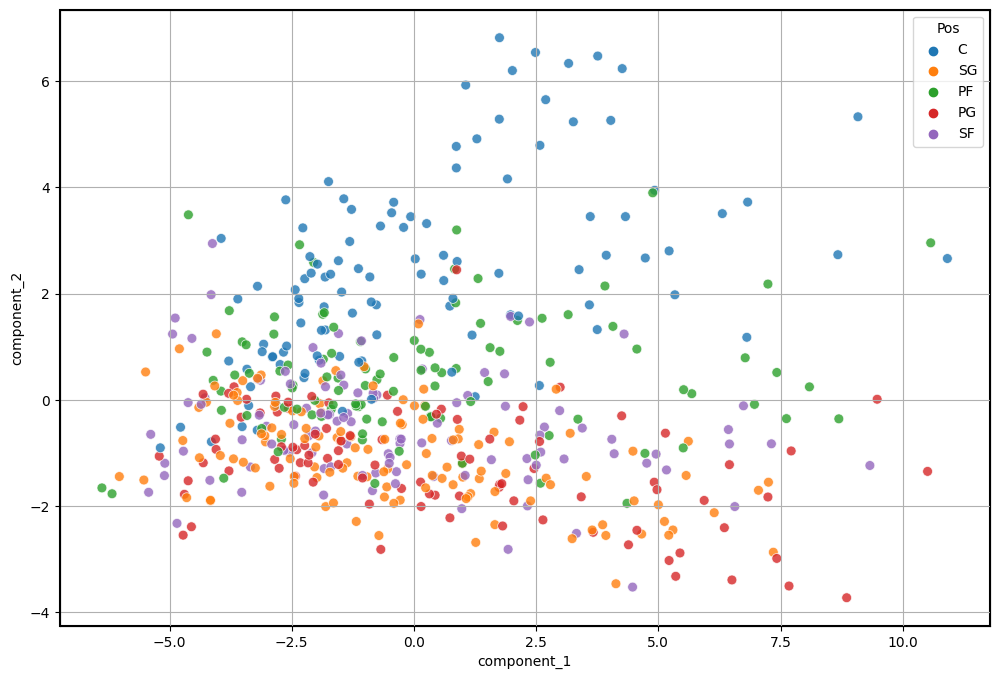

In [23]:
from sklearn.decomposition import PCA

X = df_prepro[perf_features]
pca = PCA(n_components=2)
pca.fit(X)
components = pca.transform(X)
df_pca = pd.DataFrame({'component_1': components[:,0], 'component_2': components[:,1]})

# Adding Pos column
posi = df_prepro['Pos'].reset_index()
posi = posi.drop('index', axis = 1)
c12 = pd.concat([df_pca, posi], axis = 1)

# Visualization for PCA result
plt.figure(figsize=[12, 8])
ax = sns.scatterplot(x=c12['component_1'], y=c12['component_2'], hue=c12['Pos'], s=50, alpha=0.8)
ax.grid(True)
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1.5)
plt.show()

**Explaination**

- The outcome of the Principal Component Analysis reveals that the Center (C) position exhibit a high degree of clustering.
- The other positions display a relatively mixed distribution among themselves. While there is some discernible grouping, the rest appears to be less clearly defined.

### **Finding Optimal number of Clusters (k)**
Within K-means clustering, the elbow method and silhouette score used to identify the optimal number of clusters in a dataset.

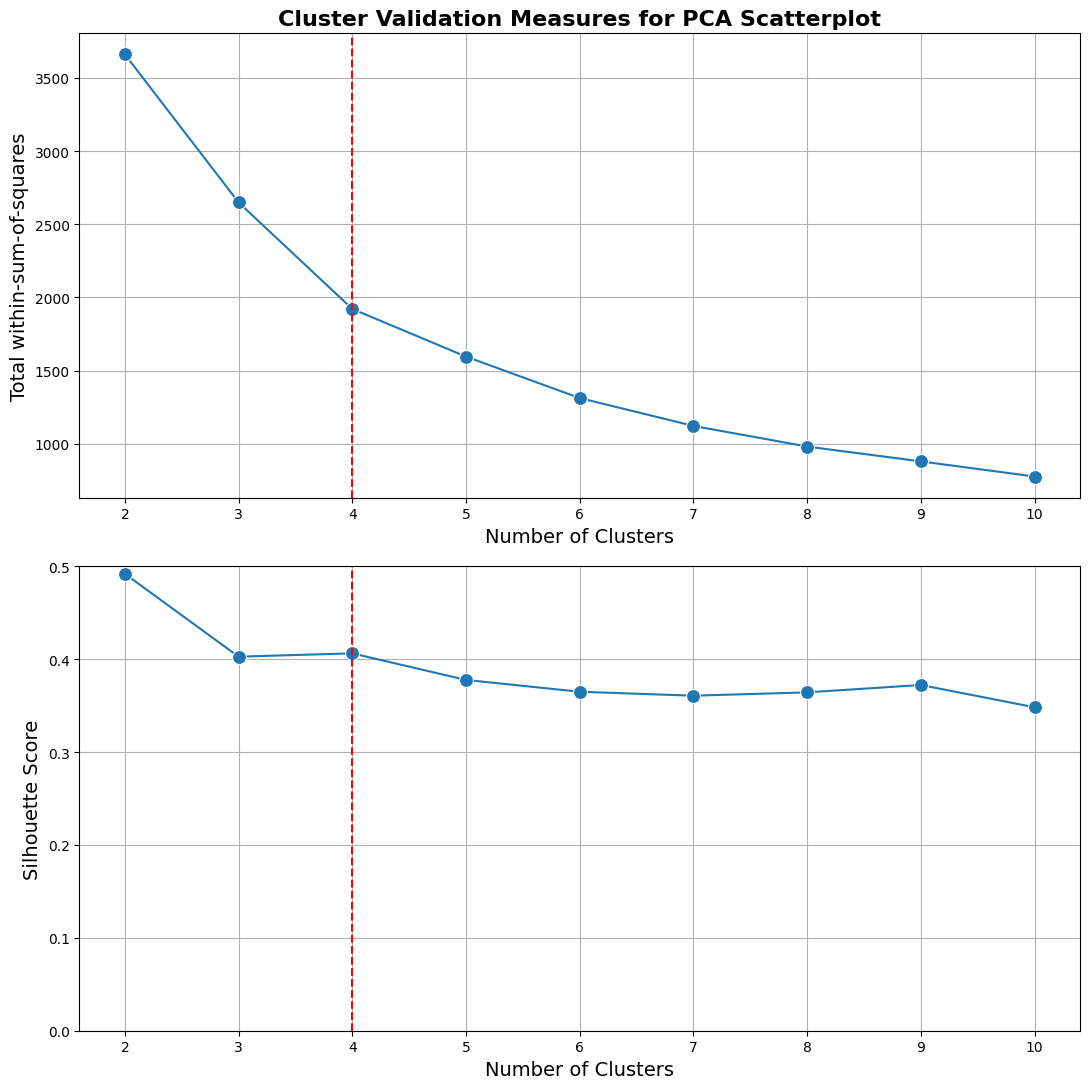

In [24]:
# Elbow method
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter = 500)
    kmeans.fit(df_pca)
    ssd.append(kmeans.inertia_)

plt.figure(figsize=[11, 11])
plt.subplot(2, 1, 1)
with plt.style.context('seaborn-whitegrid'):
    sns.lineplot(x=np.arange(2, 11, 1), y=ssd, marker='o', markersize=10, data=pd.DataFrame({'x': np.arange(2, 11, 1), 'y': ssd}))
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.axvline(4, ls="--", c="red")
    plt.ylabel('Total within-sum-of-squares', fontsize=14)
    plt.title('Cluster Validation Measures for PCA Scatterplot', fontsize=16, fontweight='bold')
    plt.grid(True)

# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
sil = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=500)
    kmeans.fit(df_pca)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    sil.append(silhouette_avg)

plt.subplot(2, 1, 2)
with plt.style.context('seaborn-whitegrid'):
    sns.lineplot(x=np.arange(2, 11, 1), y=sil, marker='o', markersize=10, data=pd.DataFrame({'x': np.arange(2, 11, 1), 'y': sil}))
    plt.yticks(np.arange(0, 0.6, 0.1))
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.axvline(4, ls="--", c="red")
    plt.ylabel('Silhouette Score', fontsize=14)
    plt.grid(True)

plt.tight_layout()
plt.show()

**Explaination and Action**

- The outcomes of the elbow method indicate that the optimal number of clusters for this dataset is 4. 
- On the other hand, the silhouette score suggests that 2 or 4 clusters are suitable, but opting for 2 clusters might be insufficient in providing meaningful information. Therefore, we will choose 4 clusters 

### **K-Means Clustering**

In [25]:
# K-means clustering with k=4
X = df_prepro[perf_features]
kmeans = KMeans(n_clusters = 4, init='k-means++', max_iter = 1000, random_state = 0)
kmeans.fit(X)

KMeans(max_iter=1000, n_clusters=4, random_state=0)

In [26]:
# Assign the label
df_prepro['cluster_id'] = kmeans.labels_

df_result = df[['Player'] + features].copy()
df_result['cluster_id'] = kmeans.labels_
df_result

,Player,Pos,G,MP,PTS,FG,FGA,FG%,3P,3PA,...,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,cluster_id
0,Precious Achiuwa,C,55,20.7,9.2,3.6,7.3,0.485,0.5,2.0,...,1.6,2.3,0.702,1.8,4.1,6.0,0.9,0.6,0.5,3
1,Steven Adams,C,42,27.0,8.6,3.7,6.3,0.597,0.0,0.0,...,1.1,3.1,0.364,5.1,6.5,11.5,2.3,0.9,1.1,3
2,Bam Adebayo,C,75,34.6,20.4,8.0,14.9,0.540,0.0,0.2,...,4.3,5.4,0.806,2.5,6.7,9.2,3.2,1.2,0.8,3
3,Ochai Agbaji,SG,59,20.5,7.9,2.8,6.5,0.427,1.4,3.9,...,0.9,1.2,0.812,0.7,1.3,2.1,1.1,0.3,0.3,2
4,Santi Aldama,PF,77,21.8,9.0,3.2,6.8,0.470,1.2,3.5,...,1.4,1.9,0.750,1.1,3.7,4.8,1.3,0.6,0.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,Thaddeus Young,PF,54,14.7,4.4,2.0,3.7,0.545,0.1,0.6,...,0.3,0.5,0.692,1.3,1.8,3.1,1.4,1.0,0.1,1
675,Trae Young,PG,73,34.8,26.2,8.2,19.0,0.429,2.1,6.3,...,7.8,8.8,0.886,0.8,2.2,3.0,10.2,1.1,0.1,0
676,Omer Yurtseven,C,9,9.2,4.4,1.8,3.0,0.593,0.3,0.8,...,0.6,0.7,0.833,0.9,1.7,2.6,0.2,0.2,0.2,1
677,Cody Zeller,C,15,14.5,6.5,2.5,3.9,0.627,0.0,0.1,...,1.6,2.3,0.686,1.7,2.6,4.3,0.7,0.2,0.3,1


## **Result Interpretation**

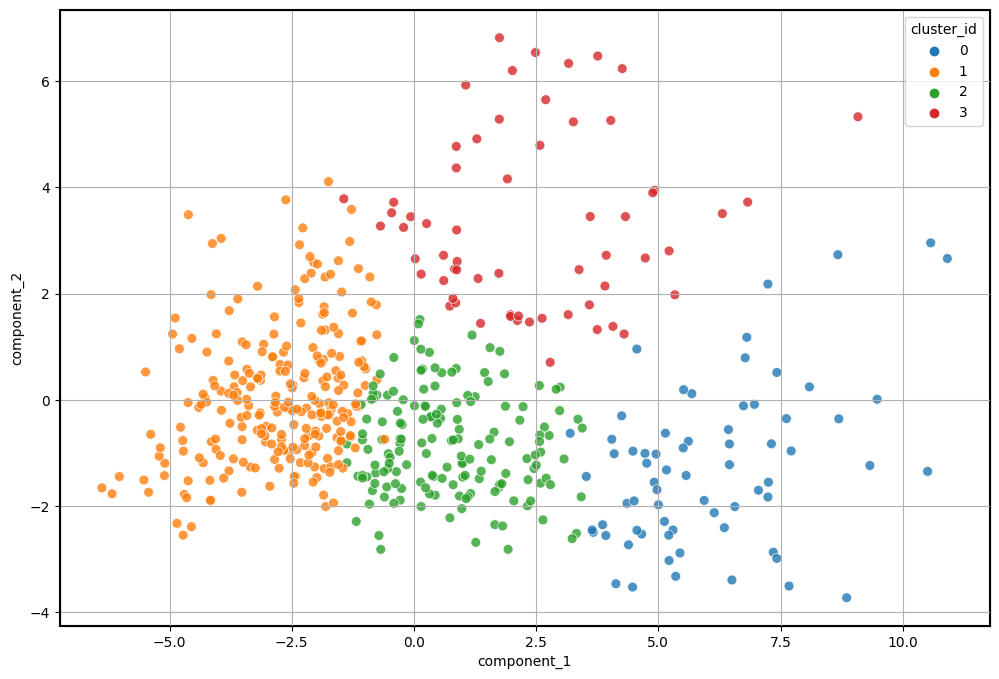

In [27]:
X = df_prepro[perf_features]
pca = PCA(n_components=2)
pca.fit(X)
components = pca.transform(X)
df_pca = pd.DataFrame({'component_1': components[:, 0], 'component_2': components[:, 1]})
df_pca['cluster_id'] = kmeans.labels_

# Plotting
plt.figure(figsize=[12, 8])
ax = sns.scatterplot(x='component_1', y='component_2', hue='cluster_id', data=df_pca, s=50, alpha=0.8, palette='tab10')
ax.grid(True)
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1.5)

In [28]:
# 5 players from each cluster
df_result.groupby('cluster_id').head().sort_values(by='cluster_id')

,Player,Pos,G,MP,PTS,FG,FGA,FG%,3P,3PA,...,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,cluster_id
29,Desmond Bane,SG,58,31.7,21.5,7.8,16.2,0.479,2.9,7.0,...,3.1,3.5,0.883,0.7,4.3,5.0,4.4,1.0,0.4,0
24,LaMelo Ball,PG,36,35.2,23.3,8.2,20.0,0.411,4.0,10.6,...,2.8,3.4,0.836,1.2,5.3,6.4,8.4,1.3,0.3,0
15,OG Anunoby,SF,67,35.6,16.8,6.3,13.2,0.476,2.1,5.5,...,2.1,2.5,0.838,1.4,3.5,5.0,2.0,1.9,0.7,0
12,Giannis Antetokounmpo,PF,63,32.1,31.1,11.2,20.3,0.553,0.7,2.7,...,7.9,12.3,0.645,2.2,9.6,11.8,5.7,0.8,0.8,0
28,Paolo Banchero,PF,72,33.8,20.0,6.7,15.6,0.427,1.2,4.0,...,5.5,7.4,0.738,1.2,5.7,6.9,3.7,0.8,0.5,0
23,Patrick Baldwin Jr.,SF,31,7.3,3.9,1.4,3.5,0.394,1.0,2.7,...,0.1,0.2,0.667,0.0,1.3,1.3,0.4,0.2,0.1,1
21,Udoka Azubuike,C,36,10.0,3.5,1.6,2.0,0.819,0.0,0.0,...,0.2,0.6,0.350,0.9,2.4,3.3,0.3,0.2,0.4,1
16,Ryan Arcidiacono,PG,20,8.6,1.3,0.5,1.9,0.243,0.4,1.2,...,0.0,0.0,0.000,0.0,0.8,0.8,1.2,0.3,0.0,1
5,Nickeil Alexander-Walker,SG,59,15.0,6.2,2.2,5.0,0.444,1.0,2.7,...,0.7,1.0,0.667,0.3,1.5,1.7,1.8,0.5,0.4,1
13,Thanasis Antetokounmpo,PF,37,5.6,1.4,0.5,1.2,0.435,0.0,0.2,...,0.3,0.6,0.500,0.4,0.8,1.2,0.4,0.1,0.1,1


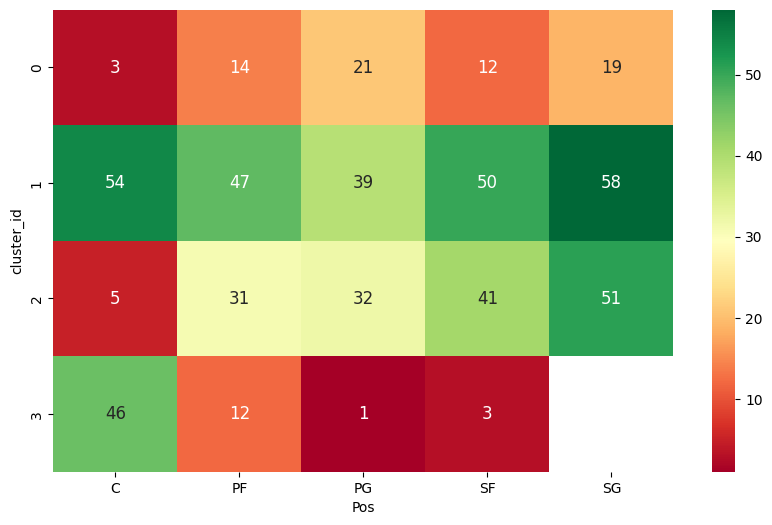

In [29]:
# Clustering result based on players position
cluster_position_counts = df_result.groupby(['cluster_id', 'Pos'])['PTS'].count().unstack()
cluster_position_counts = cluster_position_counts.loc[:, cluster_position_counts.columns]

plt.figure(figsize=[10, 6])
sns.heatmap(cluster_position_counts, cmap='RdYlGn', annot=True, annot_kws={'fontsize': 12})
plt.show()

**Explaination**

- Cluster 0 has the lowest player count among the clusters.
- Cluster 1 does not exhibit a clear dominance of any specific position. However  this cluster  has the highest player count among the clusters.
- Cluster 2 is predominantly occupied by players in the SG position, with a total of 51 players.
- Cluster 3 is primarily composed of players in the C position, totaling 46 players.

In [30]:
# Average stats of players in each cluster
df_result.groupby('cluster_id')[perf_features].mean().round(2)

,G,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,2P,...,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK
cluster_id,,,,,,,,,,,,,,,,,,,,,
0,63.45,34.10,22.98,8.13,17.17,0.47,2.25,6.17,0.36,5.88,...,0.53,4.46,5.42,0.83,0.98,4.57,5.55,5.19,1.03,0.46
1,30.90,11.33,3.91,1.46,3.31,0.44,0.46,1.42,0.29,1.01,...,0.51,0.53,0.75,0.66,0.56,1.42,1.98,0.88,0.35,0.24
2,61.12,24.55,10.29,3.73,8.25,0.45,1.48,3.97,0.37,2.26,...,0.53,1.35,1.70,0.78,0.73,2.78,3.50,2.59,0.81,0.33
3,65.69,25.47,11.54,4.58,8.14,0.58,0.47,1.41,0.23,4.11,...,0.62,1.89,2.71,0.69,2.33,5.34,7.66,2.00,0.66,1.02


**Explaination**

Based on the acquired information, we can now interpret each cluster as follows:

- **The Star (Cluster 0)**: This cluster consists of players who make significant contributions to a team. Players in this cluster are the mainstays of a team because they excel in almost all metrics. Typically, a team will have 1 to 3 players within this cluster. Due to NBA salary regulations and the high salaries associated with players in this cluster, it becomes challenging for a team to have multiple players of this type in its roster.
- **The Support (Cluster 1)**: This cluster comprises players with relatively low scoring players, likely influenced by their limited playing time (averaging only 11 minutes per game). Generally, the players in this cluster are veterans who no longer participate in as many games as they did in the past. Additionally, it may include players from the NBA G League (NBA development league) who are contracted for short durations by NBA teams, contributing to their lower performance scores in this analysis.
- **The Dynamic Scorer (Cluster 2)**: This cluster consists of players who have the ability to score points dynamically. Players in this cluster can contribute well through scoring, as indicated by an average double-digit points per game with a value of 10.29. Additionally, players in this cluster exhibit the highest average 3-point percentage compared to other clusters, with a value of 0.37.
-  **The Defensive Anchor (Cluster 3)**: This cluster consists of players with excellent defensive abilities, as evidenced by high averages in rebound metrics (ORB, DRB, and TRB) and blocks. Therefore, it is not surprising that the majority of players in this cluster occupy the Center (C) position.

In [31]:
# Cluster visualization based on ...
def box_plot(x, y):
    cluster_id_mapping = {3: 'Defensive Anchor', 1: 'Support', 2: 'Dynamic Scorer', 0: 'Star'}
    df_result['cluster_name'] = df_result[x].map(cluster_id_mapping)

    palette = {'Defensive Anchor': 'blue', 'Support': 'orange', 'Dynamic Scorer': 'green', 'Star': 'red'}
    ax = sns.boxplot(x='cluster_name', y=y, data=df_result, palette=palette)
    
    ax.set_ylabel(y, fontsize=14)
    ax.set_xlabel('Cluster', fontsize=14)
    ax.set_title('{}'.format(y), fontsize=16, fontweight='bold')
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)
    
    plt.show()

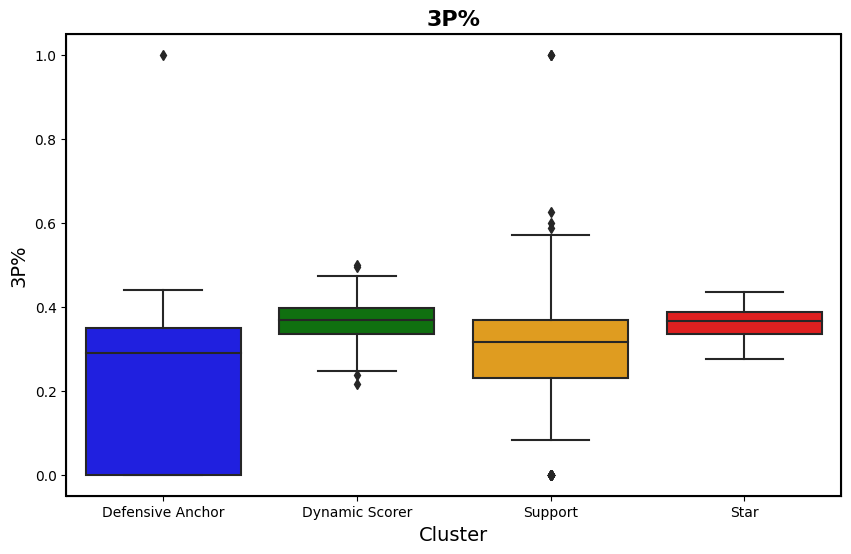

In [32]:
# 3 point successful rate
plt.figure(figsize = [10,6])
box_plot('cluster_id', '3P%')

In [44]:
# Players with high 3P percentage in cluster 2
df_result[df_result['cluster_id'] == 2].sort_values(by='3P%', ascending=False).head()

,Player,Pos,G,MP,PTS,FG,FGA,FG%,3P,3PA,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,cluster_id,cluster_name
342,Louis King,PF,1,29.0,20.0,8.0,13.0,0.615,4.0,8.0,...,1.0,0.000,2.0,2.0,4.0,2.0,1.0,0.0,2,Dynamic Scorer
337,Luke Kennard,SG,59,22.3,9.3,3.2,6.5,0.492,2.3,4.6,...,0.7,0.949,0.3,2.4,2.7,1.5,0.5,0.1,2,Dynamic Scorer
173,Kris Dunn,PG,22,25.8,13.2,5.3,9.8,0.537,0.8,1.6,...,2.4,0.774,0.4,4.1,4.5,5.6,1.1,0.5,2,Dynamic Scorer
404,Skylar Mays,PG,6,31.5,15.3,5.7,11.3,0.500,2.0,4.3,...,2.2,0.923,0.3,2.8,3.2,8.3,1.0,0.2,2,Dynamic Scorer
278,Al Horford,C,63,30.5,9.8,3.6,7.6,0.476,2.3,5.2,...,0.3,0.714,1.2,5.0,6.2,3.0,0.5,1.0,2,Dynamic Scorer


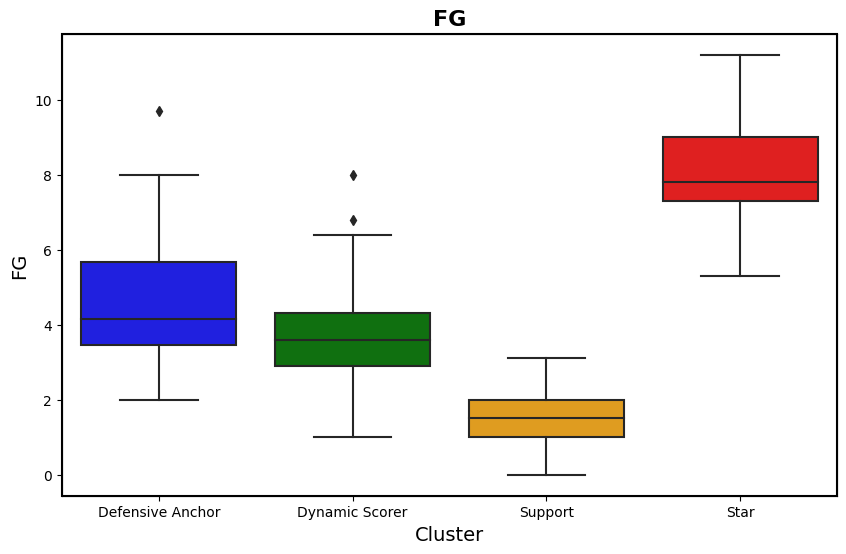

In [34]:
# Field goal made per game
plt.figure(figsize = [10,6])
box_plot('cluster_id', 'FG')

In [48]:
# Players with high FG
df_result.sort_values(by='FG', ascending=False).head()

,Player,Pos,G,MP,PTS,FG,FGA,FG%,3P,3PA,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,cluster_id,cluster_name
12,Giannis Antetokounmpo,PF,63,32.1,31.1,11.2,20.3,0.553,0.7,2.7,...,12.3,0.645,2.2,9.6,11.8,5.7,0.8,0.8,0,Star
306,LeBron James,PF,55,35.5,28.9,11.1,22.2,0.500,2.2,6.9,...,5.9,0.768,1.2,7.1,8.3,6.8,0.9,0.6,0,Star
184,Joel Embiid,C,66,34.6,33.1,11.0,20.1,0.548,1.0,3.0,...,11.7,0.857,1.7,8.4,10.2,4.2,1.0,1.7,0,Star
160,Luka Dončić,PG,66,36.2,32.4,10.9,22.0,0.496,2.8,8.2,...,10.5,0.742,0.8,7.8,8.6,8.0,1.4,0.5,0,Star
209,Shai Gilgeous-Alexander,PG,68,35.5,31.4,10.4,20.3,0.510,0.9,2.5,...,10.9,0.905,0.9,4.0,4.8,5.5,1.6,1.0,0,Star


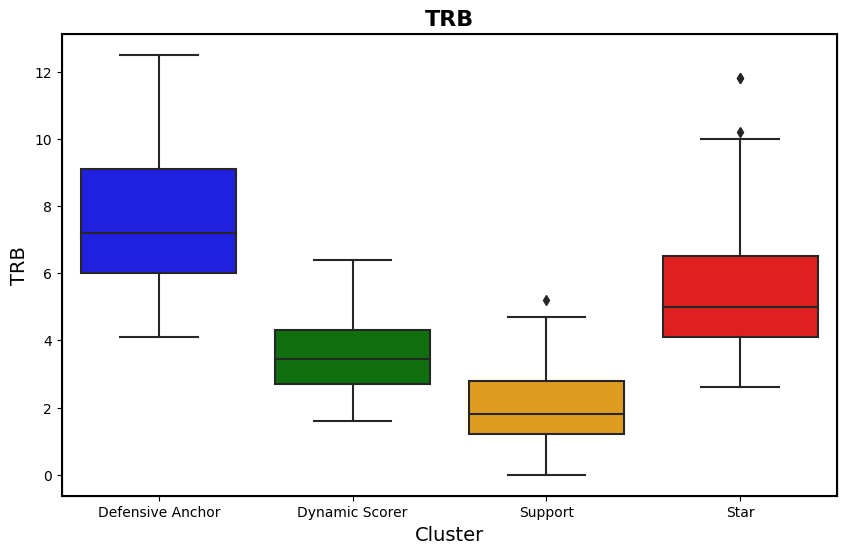

In [36]:
# Total rebound
plt.figure(figsize = [10,6])
box_plot('cluster_id', 'TRB')

In [45]:
# Players with high TRB in cluster 3
df_result[df_result['cluster_id'] == 3].sort_values(by='TRB', ascending=False).head()

,Player,Pos,G,MP,PTS,FG,FGA,FG%,3P,3PA,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,cluster_id,cluster_name
141,Anthony Davis,C,56,34.0,25.9,9.7,17.2,0.563,0.3,1.3,...,7.9,0.784,3.5,9.1,12.5,2.6,1.1,2.0,3,Defensive Anchor
549,Domantas Sabonis,C,79,34.6,19.1,7.3,11.9,0.615,0.4,1.1,...,5.5,0.742,3.2,9.1,12.3,7.3,0.8,0.5,3,Defensive Anchor
212,Rudy Gobert,C,70,30.7,13.4,5.1,7.8,0.659,0.0,0.0,...,4.9,0.644,3.3,8.3,11.6,1.2,0.8,1.4,3,Defensive Anchor
1,Steven Adams,C,42,27.0,8.6,3.7,6.3,0.597,0.0,0.0,...,3.1,0.364,5.1,6.5,11.5,2.3,0.9,1.1,3,Defensive Anchor
106,Clint Capela,C,65,26.6,12.0,5.4,8.2,0.653,0.0,0.0,...,2.0,0.603,4.0,7.1,11.0,0.9,0.7,1.2,3,Defensive Anchor


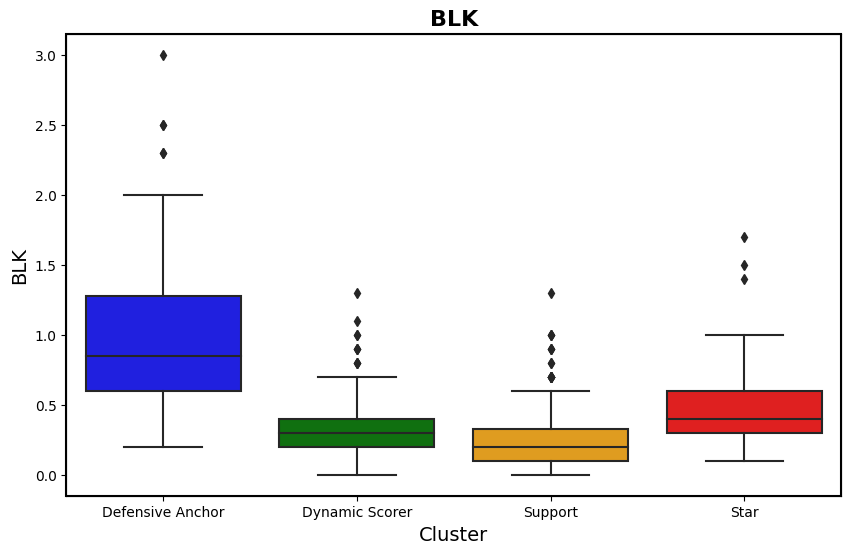

In [38]:
# Block made per game
plt.figure(figsize = [10,6])
box_plot('cluster_id', 'BLK')

In [39]:
# Players with high BLK
df_result.sort_values(by='BLK', ascending=False).head()

,Player,Pos,G,MP,PTS,FG,FGA,FG%,3P,3PA,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,cluster_id,cluster_name
300,Jaren Jackson Jr.,C,63,28.4,18.6,6.6,13.0,0.506,1.6,4.5,...,4.9,0.788,1.7,5.0,6.8,1.0,1.0,3.0,3,Defensive Anchor
378,Brook Lopez,C,78,30.4,15.9,6.1,11.5,0.531,1.7,4.7,...,2.4,0.784,2.0,4.7,6.7,1.3,0.5,2.5,3,Defensive Anchor
123,Nic Claxton,C,76,29.9,12.6,5.4,7.7,0.705,0.0,0.0,...,3.2,0.541,2.4,6.8,9.2,1.9,0.9,2.5,3,Defensive Anchor
340,Walker Kessler,C,74,23.0,9.2,4.0,5.6,0.720,0.0,0.0,...,2.1,0.516,3.1,5.3,8.4,0.9,0.4,2.3,3,Defensive Anchor
612,Myles Turner,C,62,29.4,18.0,6.5,11.8,0.548,1.5,4.0,...,4.5,0.783,1.4,6.1,7.5,1.4,0.6,2.3,3,Defensive Anchor
